# Data Science Principles Assignment

Name: Sharath Kumar

Id: 22542768

### Introduction
The dataset AutoTrader given was containing the differet types of cars, their make, model, mileage, year of registration, registration code, public reference, price, fuel type, body type, crossover and vehicle condition. In this document i have done some statistical analysis to show the insights from the data using some statistical and visualisation techniques. There are several steps involved in the data exploration right from dealing with missing data to model preperation. They are data cleaning (filling missing values, dealing with noise and outliers, feature engineering, univarite feature analysis, multivariute features analysis, feature selection, encoding, data sampling and visualisation. These operations were done with the help of libraries and important packages like pandas, numpy, matplotlib, sklearn, seaborn and scipy. The processed data in this document can be used to train the machine learning models and getting predictions from it. 

## Importing and Setting Up Packages and Environment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(8,6)})
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 1 Data Loading and Inspection

reading the dataset using pandas **`pd.read_csv()`** funcion

In [2]:
uk_cars=pd.read_csv("adverts.csv")

By inspecting the data, i decided that there is no relationship betweem the price and publice_reference. so i just dropped that coloumn with **`drop()`** function.

In [3]:
uk_cars.drop(columns='public_reference')

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel
...,...,...,...,...,...,...,...,...,...,...,...
402000,5179.0,69,Grey,Peugeot,208,USED,2019.0,10595,Hatchback,False,Petrol
402001,110000.0,59,Red,Peugeot,107,USED,2009.0,2000,Hatchback,False,Petrol
402002,52760.0,62,White,Nissan,Qashqai,USED,2012.0,7250,SUV,False,Petrol
402003,10250.0,65,Red,Abarth,595,USED,2015.0,11490,Hatchback,False,Petrol


There are two types of function that we have to see the null values.
1. **`.info()`** function gives you the information about whole features, their values, and data types.
2.**`.isnull()`** function will iterate through the each features and finds the **NaN** values and returns in the form of booleon values then these booleon values can be added with the help of **`.sum()`** function to give the no of **NaN** values.

In [4]:
uk_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [5]:
uk_cars.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [6]:
#for more convinient i have changed the names of the coloumns with meaning full and short form of names.
(uk_cars.rename(columns = {'standard_colour':'colour','standard_make':'make',
                       'standard_model':'model','vehicle_condition':'condition','year_of_registration':'year',
                       'crossover_car_and_van':'crossover'}, inplace = True))

In [7]:
#reindexing has been done for the sorting purpos in the other areas.
uk_cars = uk_cars.reindex(columns=['make', 'model','mileage', 'reg_code', 'colour',  'condition', 'year',
       'price', 'body_type', 'crossover', 'fuel_type'])

### 1.1 Meaning and Type of Features; Analysis of Distributions

I have done the analasis of distribution on features **vehicle_condition, mileage, price**

In [8]:
uk_cars['condition'].value_counts()

USED    370756
NEW      31249
Name: condition, dtype: int64

1. Analysis of Distribution for the feature **`condition`**

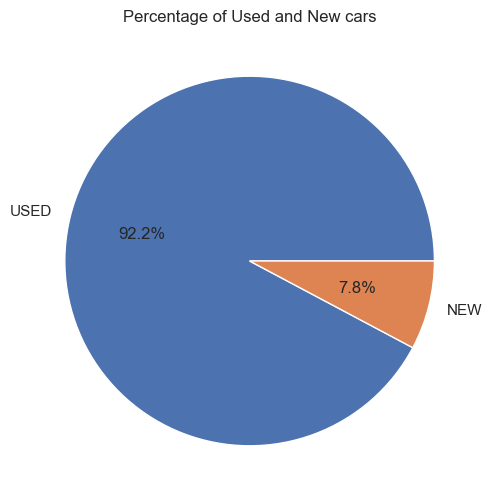

In [9]:
#analysis on the codition of the car.
plt.pie(uk_cars['condition'].value_counts(), labels=['USED', 'NEW'], autopct='%1.1f%%')
plt.title('Percentage of Used and New cars')
plt.show()

From the above data we can conclude that the dataset containing more no of used cars(92.2%) than the New cars(7.8%).

2. Analysis of Distribution for the feature **`price`**

In [10]:
uk_cars['price'].describe()

count    4.020050e+05
mean     1.734197e+04
std      4.643746e+04
min      1.200000e+02
25%      7.495000e+03
50%      1.260000e+04
75%      2.000000e+04
max      9.999999e+06
Name: price, dtype: float64

In [11]:
Q = uk_cars['price'].quantile(0.90)
Q

31990.0

In [12]:
import scipy.stats
median=np.median(uk_cars['price'])
mode = uk_cars['price'].mode()
standard_deviation = np.std(uk_cars['price'])
skewness = scipy.stats.skew(uk_cars['price'])
print('median=',median,'mode',mode,'standard_deviation=',standard_deviation,'skewness=',skewness)

median= 12600.0 mode 0    8995
Name: price, dtype: int64 standard_deviation= 46437.40319329469 skewness= 154.68094995570175


From the above data we cxan conclude the following
1. From the above 90% of the cars were under the 31990pounds only. but we have the maximum price oas 9999999. So, the maximum value might be an outlier or most expensive car.
2. Most repeated one i.e mode is 8995 and median is 12600.
3. The price was having 46437 as a standard deviation.

3. Analysis of Distribution for the feature **`year`**

In [13]:
uk_cars['year'].describe()

count    368694.000000
mean       2015.006206
std           7.962667
min         999.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2020.000000
Name: year, dtype: float64

In [14]:
Q = uk_cars['year'].quantile(0.90)
Q

2019.0

In [15]:
import scipy.stats
median=np.median(uk_cars['year'])
mode = uk_cars['year'].mode()
standard_deviation = np.std(uk_cars['year'])
skewness = scipy.stats.skew(uk_cars['year'])
print('median=',median,'mode',mode,'standard_deviation=',standard_deviation,'skewness=',skewness)

median= nan mode 0    2017.0
Name: year, dtype: float64 standard_deviation= 7.962656642075789 skewness= nan


From the above data we cxan conclude the following
1. From the above 90% of the cars were register before 2019. but we have the min value in year as 999. So, the min value might be an outlier or most expensive car.
2. Most repeated one i.e mode is 2017 and median is nan. Means dataset contains more **`'nan'`**. Because of that mean may be changed.
3. The price was having 7.9626 as a standard deviation.

### 1.2. Identification/Commenting on Missing Values

In [16]:
uk_cars.isnull().sum()

make             0
model            0
mileage        127
reg_code     31857
colour        5378
condition        0
year         33311
price            0
body_type      837
crossover        0
fuel_type      601
dtype: int64

In [17]:
uk_cars['reg_code'].isnull().sum()

31857

In [18]:
uk_cars['reg_code'].unique()

array([nan, '61', '17', '16', '64', '13', '08', '19', '60', '69', '66',
       '12', '18', '65', '09', 'B', '10', '14', '03', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '05', '59', '58', 'W', '02',
       '57', '06', '52', '53', '04', 'J', '07', '55', '51', 'X', 'D', 'S',
       'Y', '54', 'H', 'K', 'E', 'L', 'V', 'M', 'G', 'T', 'N', 'P', 'A',
       'F', 'R', 'C', '94', '85', 'CA', 'm', 'FW', '723xuu', '95', 's',
       '38', 'k', '37', 'p'], dtype=object)

There are 31857 missing values in the **`reg_code`**. These may be a result of data entry errors, system or website errors. Other reason is the vehicle may be new and it doesn't have registration code. Because of these reasons there are several missing values in registration code.

In [19]:
uk_cars['year'].isnull().sum()

33311

In [20]:
uk_cars['year'].unique()

array([  nan, 2011., 2017., 2016., 2015., 2013., 2008., 2019., 2010.,
       2012., 2018., 2009., 1984., 2014., 2003., 2006., 2020., 2005.,
       2000., 2002., 2007., 2004., 1991., 2001., 1986., 1998., 1990.,
       1993., 1987., 1994., 1999., 1970., 1988., 1995., 1997., 1969.,
       1992., 1989., 1996., 1976., 1983., 1980., 1973., 1962., 1967.,
       1972., 1982., 1968., 1979., 1964., 1933., 1981., 1985., 1978.,
       1971., 1974., 1966., 1977., 1961., 1965., 1007., 1957., 1515.,
       1963., 1063., 1954., 1975., 1955., 1009., 1016., 1960., 1956.,
       1959., 1909., 1934., 1958., 1010., 1950., 1008., 1018.,  999.,
       1017., 1952., 1006., 1015.])

There are 33311 missing values in the **`year`**. These may be a result of data entry errors, system or website errors. Other reason is the vehicle may be new and it doesn't have year of registration. Because of these reasons there are several missing values in year of registration.

In [21]:
uk_cars['colour'].isnull().sum()

5378

In [22]:
uk_cars['colour'].unique()

array(['Grey', 'Blue', 'Brown', 'Red', 'Bronze', 'Black', 'White',
       'Silver', nan, 'Purple', 'Green', 'Orange', 'Yellow', 'Turquoise',
       'Gold', 'Multicolour', 'Beige', 'Burgundy', 'Pink', 'Maroon',
       'Magenta', 'Navy', 'Indigo'], dtype=object)

There are 22 number of colours. Many brands with many model may release different type of colours. Some of the cars are new and others are used ones. During recording of the data there may be a chance of missing data. Because of that there are 5378 number of null values in the **`colour`** to treat.

### 1.3. Identification/Commenting on Outliers and Noise

In [23]:
uk_cars['reg_code'].unique()

array([nan, '61', '17', '16', '64', '13', '08', '19', '60', '69', '66',
       '12', '18', '65', '09', 'B', '10', '14', '03', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '05', '59', '58', 'W', '02',
       '57', '06', '52', '53', '04', 'J', '07', '55', '51', 'X', 'D', 'S',
       'Y', '54', 'H', 'K', 'E', 'L', 'V', 'M', 'G', 'T', 'N', 'P', 'A',
       'F', 'R', 'C', '94', '85', 'CA', 'm', 'FW', '723xuu', '95', 's',
       '38', 'k', '37', 'p'], dtype=object)

1. By inspecting the above data the values which are far from the original values are called as outliers. In this case ['95', '85','94','38', '37'] are the outliers. These are not yes deployed into the reality by the uk government.
2. The values which are incorrect and present in the data are called noise. In this case the noise is ['CA', '723xuu'] are the noise. 

In [24]:
uk_cars['year'].unique()

array([  nan, 2011., 2017., 2016., 2015., 2013., 2008., 2019., 2010.,
       2012., 2018., 2009., 1984., 2014., 2003., 2006., 2020., 2005.,
       2000., 2002., 2007., 2004., 1991., 2001., 1986., 1998., 1990.,
       1993., 1987., 1994., 1999., 1970., 1988., 1995., 1997., 1969.,
       1992., 1989., 1996., 1976., 1983., 1980., 1973., 1962., 1967.,
       1972., 1982., 1968., 1979., 1964., 1933., 1981., 1985., 1978.,
       1971., 1974., 1966., 1977., 1961., 1965., 1007., 1957., 1515.,
       1963., 1063., 1954., 1975., 1955., 1009., 1016., 1960., 1956.,
       1959., 1909., 1934., 1958., 1010., 1950., 1008., 1018.,  999.,
       1017., 1952., 1006., 1015.])

By inspecting the above data the values which are far from the original values and outliers are same. In this case [1063.,1009., 1016.,1909., 1010., 1008., 1018.,  999.,1017., 1006., 1015.] are the outliers and noise too. No registrations were done during those years. So, they are noise and outliers.

# 2. Data Processing

### 2.1 Dealing with Missing Values, Outliers, and Noise

1. Dealing with missing values, Outliers and Noise in **`reg_code`**

In [25]:
#The cars with reg_year as NaN and the vehicle_condition was NEW are replaced with 2022 using .mask() function
uk_cars['year']=uk_cars['year'].mask((uk_cars['year'].isnull())&(uk_cars['condition']=='NEW'), 2022)

In [26]:
#The cars with reg_code as NaN and year is 2022 were replaced with 72 using .mask() function
uk_cars['reg_code']=uk_cars['reg_code'].mask((uk_cars['reg_code'].isnull())&(uk_cars['year']==2022), 72)

In [27]:
#Its is not possible to predict the NaN valuse witout reg_code, year and condition as USED. So dropped those coloumns.
uk_cars.drop(uk_cars.loc[(uk_cars['reg_code'].isnull())&(uk_cars['year'].isnull())].index, inplace=True)

In [28]:
uk_cars['reg_code'].isnull().sum()

287

In [29]:
#At last i was left with 287 rows. So i simply dropped as we have plenty of data. 
uk_cars.drop(uk_cars.loc[uk_cars['reg_code'].isnull()].index, inplace=True)

In [30]:
#Thius is the noise and outliers in the data set. Need to be dropped for accurate predition.
uk_cars.drop(uk_cars.loc[(uk_cars['reg_code'].isin(['CA', '723xuu', '95', '85','94','38', '37']))].index, inplace=True)

In [31]:
uk_cars.isnull().sum()

make            0
model           0
mileage       114
reg_code        0
colour       5347
condition       0
year         1732
price           0
body_type     765
crossover       0
fuel_type     587
dtype: int64

2. Dealing with missing values, Outliers and Noise in **`year`**

We have alredy deal with the **`reg_code`**, during that process NaN values in the **`year`** was reduced to 1732. I have found the median of the each year based on reg_code using **`.groupby()`** and **`.median`**. Then filled the year with that median

In [32]:
#craeting a data frame with the data of null values in year
missing=uk_cars[uk_cars['year'].isna()]
#finding the median of an year
median = uk_cars.groupby('reg_code').year.median()
#filling the year with median.
uk_cars.year.fillna(missing.reg_code.map(median), inplace=True)

In [33]:
uk_cars['year'].isnull().sum()

0

In [34]:
#dealing with noise and outliers in the year
uk_cars.drop(uk_cars.loc[uk_cars['year']<=1909].index, inplace=True)

We can also use Inter Quartile Percentile(IQR) for the year. But most of the data fall under the 2007 was dropped by the IQR. I have used IQR for mileage and price (not disclosed here).

**I have dealt with missing values in fuel_type by filling the mode of the data in unique car models. And remaining was sorted by make and model. backfilled with the previous value of the feature.**

### Dealing with other features missing values

In [35]:
#sorting based on nmake and model
uk_cars = uk_cars.sort_values(['make', 'model'],ascending = [True, True])

In [36]:
#dealing with fuel type
val_count=uk_cars['model'].value_counts()
#dropping the rows of a fuel type based on unique models
uk_cars = uk_cars[~(uk_cars['model'].isin(val_count[val_count==1].index) & uk_cars['fuel_type'].isnull())]

In [37]:
#backfilling the fuel_type with fillna()
uk_cars = uk_cars.fillna({'fuel_type':uk_cars['fuel_type'].bfill()})

In [38]:
uk_cars['colour'].mode()

0    Black
Name: colour, dtype: object

In [39]:
#filling the nan values in colour with mode which are having unique models
#because of colour i dont want to lose other data
uk_cars.loc[(uk_cars['model'].isin(val_count[val_count==1].index) & uk_cars['colour'].isnull()), 'colour']='Black'

In [40]:
#dropping the 
uk_cars = uk_cars[~(uk_cars['model'].isin(val_count[val_count==1].index) & uk_cars['body_type'].isnull())]

In [41]:
uk_cars.isnull().sum()

make            0
model           0
mileage       114
reg_code        0
colour       5326
condition       0
year            0
price           0
body_type     749
crossover       0
fuel_type       0
dtype: int64

In [42]:
missing=uk_cars[uk_cars['body_type'].isna()]
mode_123=uk_cars.groupby('model')['body_type'].apply(lambda x:x.mode())
for index, row in missing.iterrows():
    body=row['model']
    try:
        mode = mode_123[body][0]
        uk_cars.at[index, 'body_type']=mode
    except KeyError:
        continue

In [43]:
uk_cars.drop(uk_cars.loc[uk_cars['body_type'].isnull()].index, inplace=True)

In [44]:
uk_cars.isnull().sum()

make            0
model           0
mileage       114
reg_code        0
colour       5325
condition       0
year            0
price           0
body_type       0
crossover       0
fuel_type       0
dtype: int64

In [45]:
missing=uk_cars[uk_cars['mileage'].isna()]
median = uk_cars.groupby('year').mileage.median()
uk_cars.mileage.fillna(missing.year.map(median), inplace=True)

In [46]:
uk_cars.isnull().sum()

make            0
model           0
mileage         0
reg_code        0
colour       5325
condition       0
year            0
price           0
body_type       0
crossover       0
fuel_type       0
dtype: int64

In [47]:
missing=uk_cars[uk_cars['colour'].isna()]
mode_123=uk_cars.groupby('model')['colour'].apply(lambda x:x.mode())
for index, row in missing.iterrows():
    colour=row['model']
    try:
        mode = mode_123[colour][0]
        uk_cars.at[index, 'colour']=mode
    except KeyError:
        continue

In [48]:
uk_cars.isnull().sum()

make         0
model        0
mileage      0
reg_code     0
colour       0
condition    0
year         0
price        0
body_type    0
crossover    0
fuel_type    0
dtype: int64

In [49]:
uk_cars.shape

(401336, 11)

### Dealing with Noise

The identified noise can be dropped using **`.drop`**as we have sufficient data in the dataset. Else, we need to treat the each value by taking the each feature

In [50]:
uk_cars.drop(uk_cars.loc[(uk_cars['mileage']==0)&(uk_cars['condition']=='USED')].index, inplace=True)

### Dealing with other features Outliers

In [51]:
uk_cars.shape

(400983, 11)

In [52]:
uk_cars.isnull().sum()

make         0
model        0
mileage      0
reg_code     0
colour       0
condition    0
year         0
price        0
body_type    0
crossover    0
fuel_type    0
dtype: int64

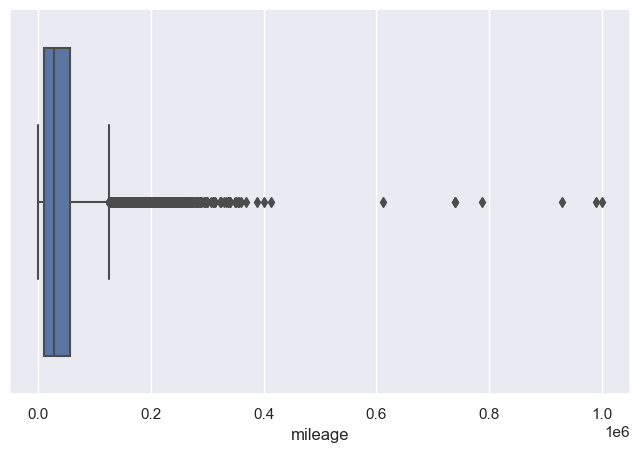

In [53]:
#Before dealing with the outliers
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=uk_cars['mileage'])
plt.show()

In [54]:
Q1=uk_cars['mileage'].quantile(0.25)
Q3=uk_cars['mileage'].quantile(0.75)
IQR=Q3-Q1
uk_cars= uk_cars.query('@Q1-1.5 *@IQR<= mileage <= @Q3+1.5*@IQR')

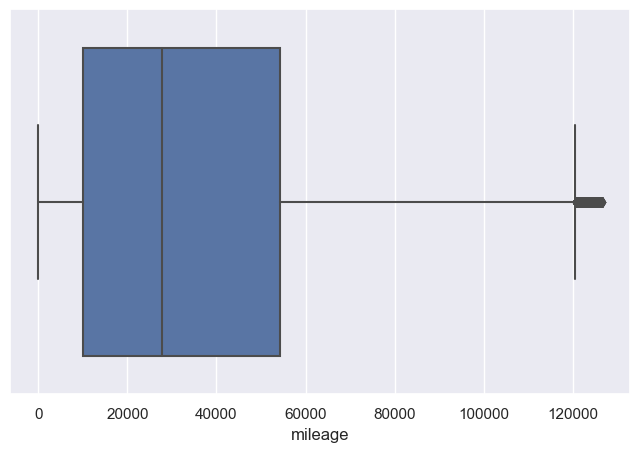

In [55]:
#After dealing with the outliers
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=uk_cars['mileage'])
plt.show()

In [56]:
uk_cars.isnull().sum()

make         0
model        0
mileage      0
reg_code     0
colour       0
condition    0
year         0
price        0
body_type    0
crossover    0
fuel_type    0
dtype: int64

In [57]:
uk_cars.shape

(392835, 11)

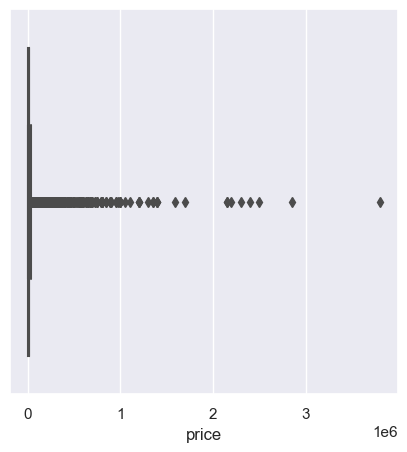

In [58]:
#Before removing the outlierts
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x=uk_cars['price'])
plt.show()

In [59]:
#identifying and removing the outliers from the price
Q1=uk_cars['price'].quantile(0.25)
Q3=uk_cars['price'].quantile(0.75)
IQR=Q3-Q1
uk_cars= uk_cars.query('@Q1-1.5 *@IQR<= price <= @Q3+1.5*@IQR')

In [60]:
uk_cars.shape

(367750, 11)

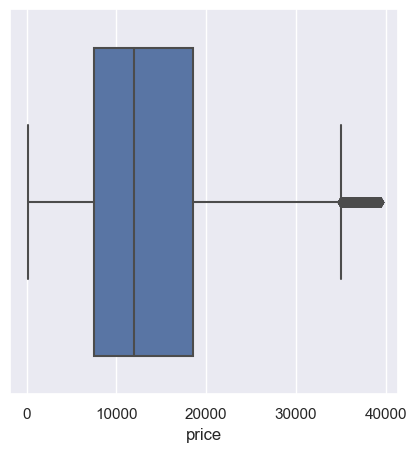

In [61]:
#After removing the outliers
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x=uk_cars['price'])
plt.show()

### 2.2. Feature Engineering, Data Transformations

### Feature Extraction 

one of the feature that can be extracted from the data is age by considering the year of registration.

In [62]:
#creating a new coloumn in dataframe with name 'current_year' and assing a value as 2022
uk_cars['current_year']=2022

In [63]:
#creating a new coloumn in dataframe with name 'age' and assinging the value by subtracting the current_year and year.
uk_cars['age']=uk_cars['current_year']-uk_cars['year']

In [64]:
#droping the coloumns 'current_year', 'year'
uk_cars=uk_cars.drop(columns=['current_year', 'year'])

### Data Transformations

In [65]:
uk_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367750 entries, 7575 to 389329
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   make       367750 non-null  object 
 1   model      367750 non-null  object 
 2   mileage    367750 non-null  float64
 3   reg_code   367750 non-null  object 
 4   colour     367750 non-null  object 
 5   condition  367750 non-null  object 
 6   price      367750 non-null  int64  
 7   body_type  367750 non-null  object 
 8   crossover  367750 non-null  bool   
 9   fuel_type  367750 non-null  object 
 10  age        367750 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 31.2+ MB


Data types of the each feature was changed using **`.astype()`**. For **reg_code** was havinh lower letter, those has been changed into upper using **`.str.upper()`**

In [66]:
#changing the data type from float to int64
uk_cars['mileage']=uk_cars['mileage'].astype('int64')

In [67]:
#changing the data type from float to int64
uk_cars['age']=uk_cars['age'].astype('int64')

In [68]:
uk_cars['reg_code'].unique()

array(['18', '17', '19', '67', '68', '66', '13', '09', '10', '11', '61',
       '64', '15', '14', '60', '62', '59', '12', '63', '65', '16', 72,
       '70', '69', '20', '08', '58', '56', 'P', '54', '53', '07', '05',
       '57', '55', '04', '06', 'X', '03', '52', '51', 'N', 'F', 'L', 'Y',
       'R', 'V', 'T', 'S', 'W', 'K', 'H', '02', 'M', 'A', 'E', 'C', 'B',
       'J', 'G', 'D', 'p', 'k', 'm', 'FW', 's'], dtype=object)

In [69]:
#changing the lower case letters in a reg_code to upper case
uk_cars['reg_code'].str.upper()

7575      18
11239     17
19830     18
25078     19
25816     18
          ..
65926      K
106225     R
95677      B
228669    67
389329    19
Name: reg_code, Length: 367750, dtype: object

In [70]:
uk_cars['reg_code'].unique()

array(['18', '17', '19', '67', '68', '66', '13', '09', '10', '11', '61',
       '64', '15', '14', '60', '62', '59', '12', '63', '65', '16', 72,
       '70', '69', '20', '08', '58', '56', 'P', '54', '53', '07', '05',
       '57', '55', '04', '06', 'X', '03', '52', '51', 'N', 'F', 'L', 'Y',
       'R', 'V', 'T', 'S', 'W', 'K', 'H', '02', 'M', 'A', 'E', 'C', 'B',
       'J', 'G', 'D', 'p', 'k', 'm', 'FW', 's'], dtype=object)

One of the way to do data transformation is **`log`** transformation. Data tranformation is needed to avoid underfitting or overfitting problems, to reduce computational time and memory.

1. Data transformation using log function for features mileage and age

<AxesSubplot:xlabel='mileage', ylabel='Count'>

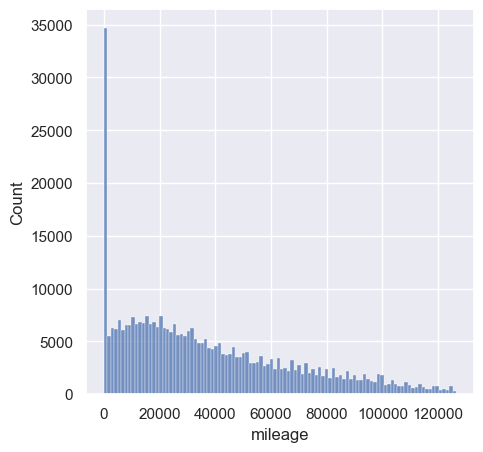

In [71]:
#before transformations
sns.set(rc={'figure.figsize':(5,5)})
sns.histplot(uk_cars['mileage'])

Data transformation can be done using **`np.log10`** funtion to make the data distribution more clear

<AxesSubplot:xlabel='mileage', ylabel='Count'>

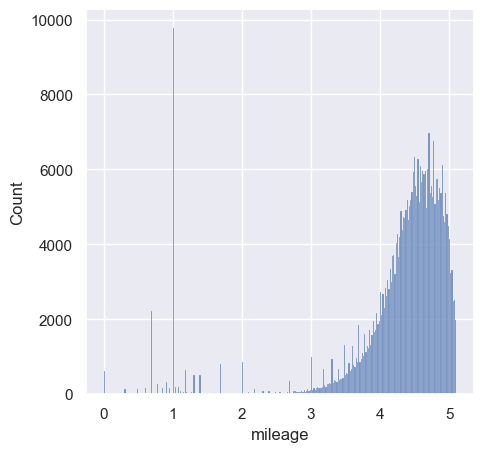

In [72]:
#after transformation
sns.histplot(np.log10(uk_cars['mileage']))

<AxesSubplot:xlabel='age', ylabel='Count'>

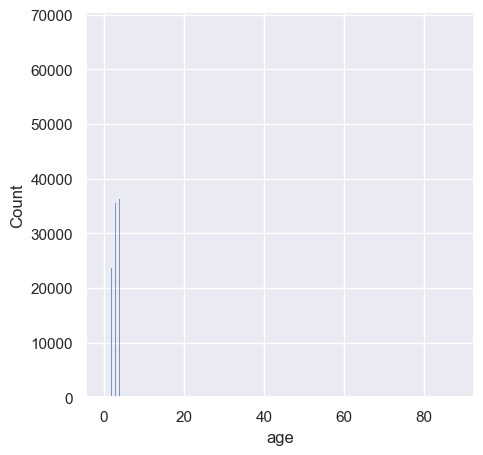

In [73]:
#Before taking the log function
sns.histplot(uk_cars['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

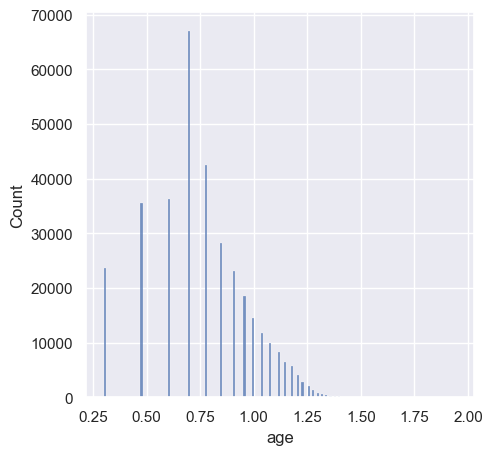

In [74]:
#After taking the log function
sns.histplot(np.log10(uk_cars['age']))

<AxesSubplot:xlabel='price', ylabel='Count'>

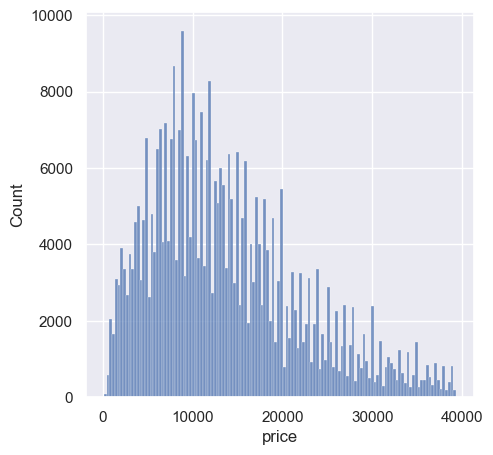

In [75]:
#before taking log
sns.histplot(uk_cars['price'])

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
price = np.array(uk_cars['price']).reshape(-1,1)
scaler.fit(price)
After_scaling = scaler.transform(price)
print(After_scaling)

[[0.47336222]
 [0.46851899]
 [0.45564619]
 ...
 [0.22635738]
 [0.7616365 ]
 [0.65957176]]


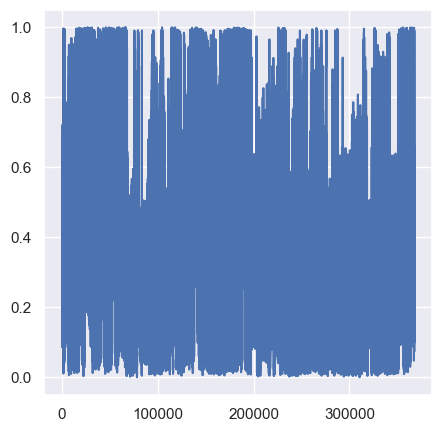

In [77]:
#After scaling the values has been adjusted between 0 to 1
plt.plot(After_scaling)
plt.show()

For random forest regressor scaling is not needed.

### 2.3. Subsetting (e.g., Feature Selection, Data Sampling)

#### Feature Selection

In [78]:
uk_car = uk_cars.copy()

In [79]:
uk_car.columns

Index(['make', 'model', 'mileage', 'reg_code', 'colour', 'condition', 'price',
       'body_type', 'crossover', 'fuel_type', 'age'],
      dtype='object')

For selecting the best features we need to transform the data to numerical from other data types.

In [80]:
#using the map funtion replacing the values of 'condition' and 'crossover' values with 0 and 1
#one hot encoding can be done for the same, but by considering the no of rows i have used map function instead.
uk_car['condition'] = uk_car['condition'].map({'NEW':1, 'USED':0})
uk_car['crossover'] = uk_car['crossover'].map({True:1, False:0})

In [81]:
uk_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367750 entries, 7575 to 389329
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   make       367750 non-null  object
 1   model      367750 non-null  object
 2   mileage    367750 non-null  int64 
 3   reg_code   367750 non-null  object
 4   colour     367750 non-null  object
 5   condition  367750 non-null  int64 
 6   price      367750 non-null  int64 
 7   body_type  367750 non-null  object
 8   crossover  367750 non-null  int64 
 9   fuel_type  367750 non-null  object
 10  age        367750 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 33.7+ MB


In [82]:
#labelencoding on the categorical variables
from sklearn.preprocessing import LabelEncoder
lable_enc = LabelEncoder()
coloumns = ['make', 'model','colour', 'body_type', 'fuel_type']
uk_car[coloumns]=uk_car[coloumns].apply(lable_enc.fit_transform)

In [83]:
uk_car

,make,model,mileage,reg_code,colour,condition,price,body_type,crossover,fuel_type,age
7575,0,10,9154,18,8,0,18690,3,0,5,4
11239,0,10,7124,17,8,0,18500,3,0,5,5
19830,0,10,19711,18,1,0,17995,3,0,5,4
25078,0,10,8121,19,20,0,20481,3,0,5,3
25816,0,10,15000,18,17,0,18495,3,0,5,4
...,...,...,...,...,...,...,...,...,...,...,...
65926,87,755,4189,K,1,0,8950,3,0,5,30
106225,87,789,16800,R,1,0,12995,3,0,5,25
95677,88,101,84000,B,11,0,9000,13,0,5,58
228669,89,357,3800,67,12,0,29999,3,0,5,4


There are two methods to find the best features.
1. seleting the best features based on the pearson correlation using seaborn heatmap
2. selecting the best features by using SelectKBest from sklearn

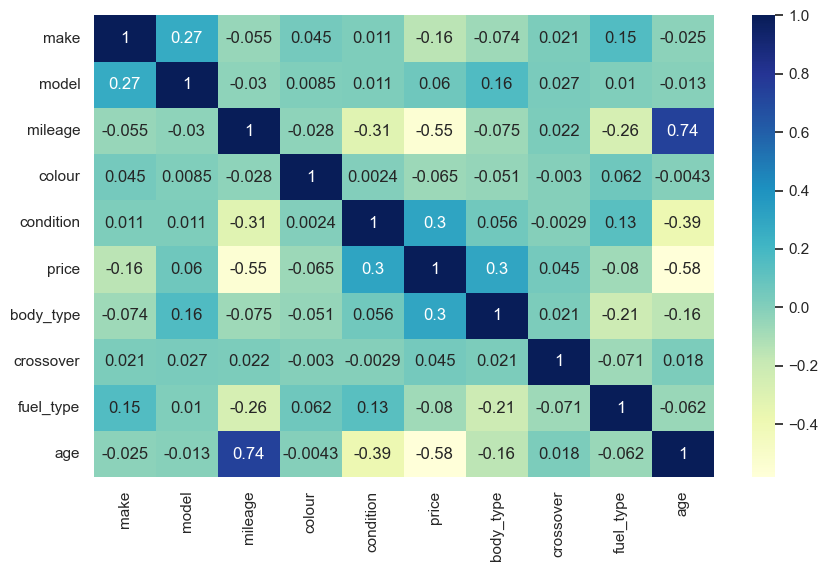

In [84]:
#seleting the best features based on the pearson correlation using seaborn heatmap
sns.set(rc={'figure.figsize':(10,6)})
plot = sns.heatmap(uk_car.corr(),  cmap="YlGnBu",annot=True)

In [85]:
#selecting the best features by using SelectKBest from sklearn
from sklearn.feature_selection import SelectKBest, f_regression
#splitting the data
X_train = uk_car.drop(columns=['price', 'reg_code'])
y_train = uk_car['price']
#initialising the model
selector = SelectKBest(score_func=f_regression, k=9)
#fitting the model
selector.fit(X_train, y_train)
top_features = selector.get_support(indices = True)
print(X_train.columns[top_features])

Index(['make', 'model', 'mileage', 'colour', 'condition', 'body_type',
       'crossover', 'fuel_type', 'age'],
      dtype='object')


In [86]:
#Calculating the scores
scores = selector.scores_
print(scores)

[  9137.69807762   1338.46786082 157893.95366823   1555.06107313
  37603.71884348  36425.03713196    730.54714418   2348.95565142
 189464.61391755]


From the above data we can say that the features that are having greater relationship with the target is in the order of **['age','mileage', 'condition','body_type','make', 'fuel_type','colour', 'model','crossover']**

#### Data Sampling

In [87]:
uk_cars['colour'].value_counts()

Black          78775
White          67409
Grey           61519
Blue           55181
Silver         45787
Red            40149
Green           3977
Orange          3845
Brown           1939
Yellow          1875
Multicolour     1798
Beige           1429
Bronze          1282
Purple          1148
Gold             715
Pink             405
Turquoise        294
Maroon           143
Burgundy          61
Magenta           14
Navy               4
Indigo             1
Name: colour, dtype: int64

In [88]:
uk_cars['make'].value_counts()

BMW              33277
Vauxhall         33160
Volkswagen       32884
Audi             30947
Mercedes-Benz    28444
                 ...  
Sebring              1
Noble                1
Panther              1
Pilgrim              1
Leyland              1
Name: make, Length: 90, dtype: int64

In [89]:
uk_cars['age'].value_counts()

5     67070
6     42392
4     36232
3     35478
7     28209
      ...  
68        1
60        1
88        1
70        1
61        1
Name: age, Length: 65, dtype: int64

In [90]:
uk_cars['body_type'].value_counts()

Hatchback      164308
SUV            101009
Saloon          32597
Estate          22254
Coupe           17944
MPV             15307
Convertible     13212
Pickup            553
Combi Van         222
Minibus           135
Limousine          76
Camper             44
Panel Van          43
Window Van         43
Chassis Cab         3
Name: body_type, dtype: int64

In [91]:
uk_cars['fuel_type'].value_counts()

Petrol                   202323
Diesel                   143800
Petrol Hybrid             12820
Petrol Plug-in Hybrid      4115
Electric                   3701
Diesel Hybrid               644
Bi Fuel                     212
Diesel Plug-in Hybrid       135
Name: fuel_type, dtype: int64

In [92]:
colo = pd.Index(['mileage', 'reg_code', 'colour', 'make', 'model', 'condition',  'age', 'price', 
                 'body_type', 'crossover', 'fuel_type'])
conditions = ((uk_cars['make'].isin(['BMW','Vauxhall' ,'Volkswagen','Audi','Mercedes-Benz'])) & 
              (uk_cars['colour'].isin(['Black', 'White','Grey','Blue','Silver','Red'])) &
              (uk_cars['age']<10) &
              (uk_cars['body_type'].isin(['Hatchback','SUV','Saloon', 'Estate', 'Coupe','MPV','Convertible','Pickup'])) &
              (uk_cars['fuel_type'].isin(['Petrol', 'Diesel','Petrol Hybrid'])))
subset = uk_cars.loc[ conditions, colo ]

Using the above code, i have created a subset of data by taking the top valuecounts in important features

In [93]:
subset

,mileage,reg_code,colour,make,model,condition,age,price,body_type,crossover,fuel_type
56,47000,16,Black,Audi,A1,USED,6,9800,Hatchback,False,Petrol
87,33000,66,Silver,Audi,A1,USED,6,14995,Hatchback,False,Diesel
245,41227,15,Blue,Audi,A1,USED,7,11799,Hatchback,False,Petrol
265,63262,13,White,Audi,A1,USED,9,9000,Hatchback,False,Diesel
275,11303,68,Black,Audi,A1,USED,4,16500,Hatchback,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...
401151,22000,64,White,Volkswagen,up!,USED,8,4890,Hatchback,False,Petrol
401387,7257,17,Blue,Volkswagen,up!,USED,5,7690,Hatchback,False,Petrol
401537,83553,15,White,Volkswagen,up!,USED,7,3989,Hatchback,False,Petrol
401690,22543,18,Red,Volkswagen,up!,USED,4,9995,Hatchback,False,Petrol


In [94]:
df = uk_cars.sample(50000)

# 3. Association and Group Differences Analysis

### 3.1. Quantitative-Quantitative

<AxesSubplot:xlabel='age', ylabel='price'>

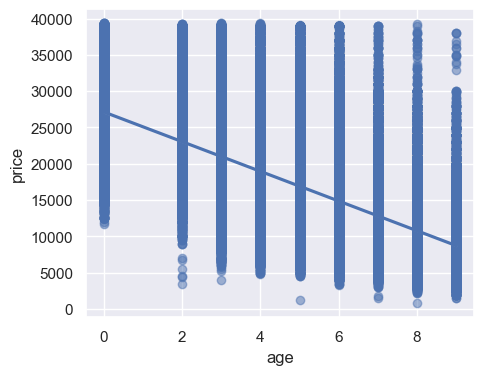

In [95]:
fig, axs = plt.subplots(figsize=(5,4), sharey=True)
sns.regplot(data=subset, x='age', y='price', scatter_kws={'alpha':0.5})

From the above graph we can say that the price was having strong relationship with the age. As age is increasing the price was decresing. But other factors like condition of the vehicle was also effects the price of the vehicle.

<function matplotlib.pyplot.show(close=None, block=None)>

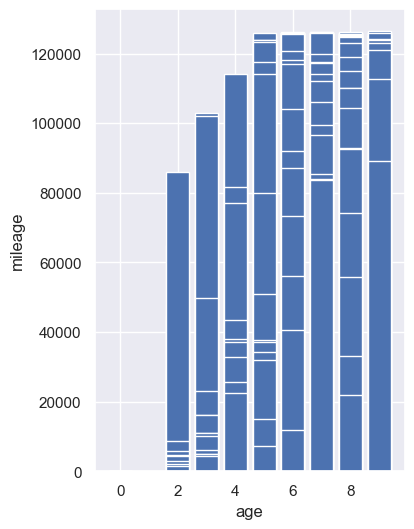

In [96]:
plt.subplots(figsize=(4,6))
plt.bar(subset['age'], subset['mileage'])
plt.xlabel('age')
plt.ylabel('mileage')
plt.show

Text(0.5, 0, 'age')

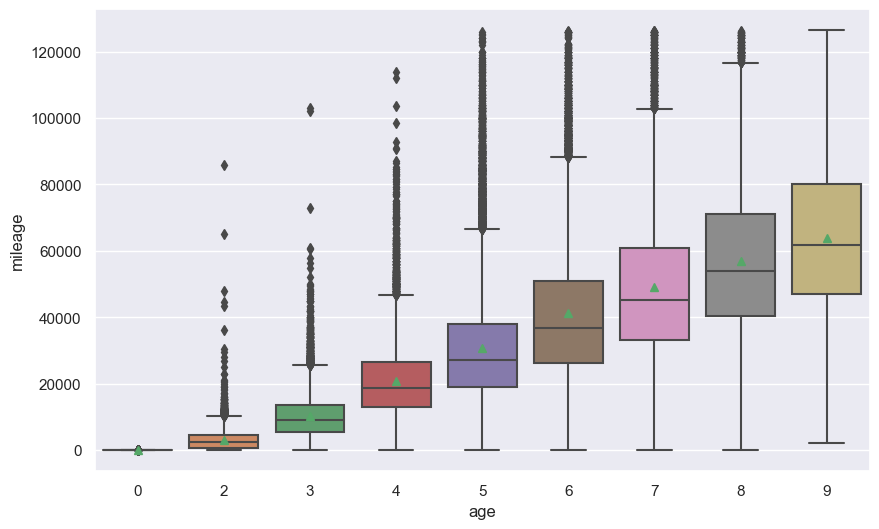

In [97]:
ax = sns.boxplot(x='age', y='mileage', showmeans=True, data=subset)
ax.set_ylabel('mileage')
ax.set_xlabel('age')

The graph was drawn between top 10 years of age and mileage. From the above graph, we can say that the the age and mileage are inversly proportional each other. The values 0,1 and 2 are having 0 mileage. Those are new cars. 

Text(0, 0.5, 'Price')

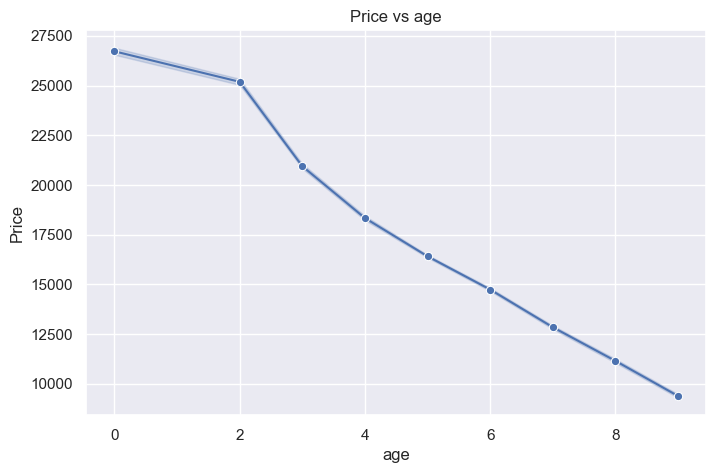

In [98]:
sns.set(rc={'figure.figsize':(8,5)})
sns.lineplot(x='age', y='price', data=subset, marker='o')
plt.title("Price vs age")
plt.xlabel("age")
plt.ylabel("Price")

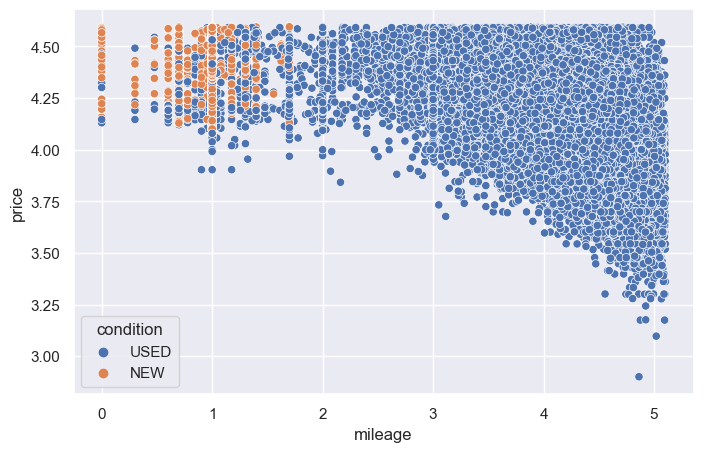

In [99]:
ax = sns.scatterplot(x=np.log10(subset['mileage']), y=np.log10(subset['price']), data=subset, hue='condition')

There are less no of new vehicles in the age range of (0-1)

### 3.2. Quantitative-Categorical

<AxesSubplot:xlabel='make'>

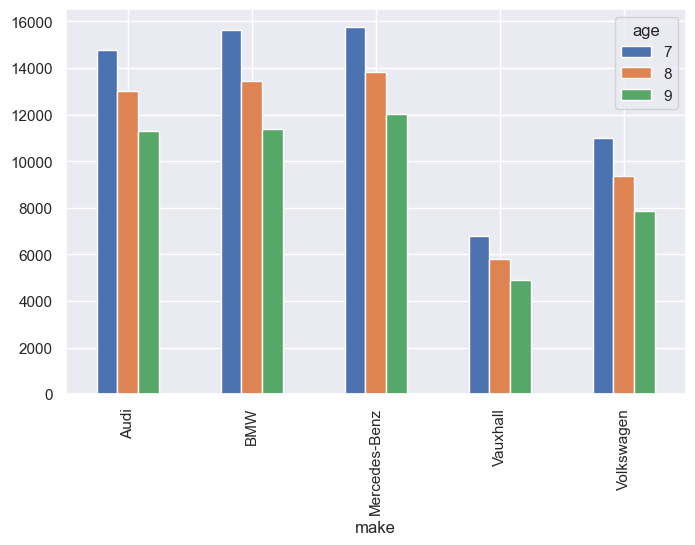

In [100]:
subset.groupby(['make','age'])['price'].mean().unstack('age').loc[:,7:10].plot.bar()

The above barplot has been drawn between top 5 makes and mean price of the cars according to the age. When the age was incresing the mean price of the cars was decreasing. But Mercedes-benz was in the top among the all brands.

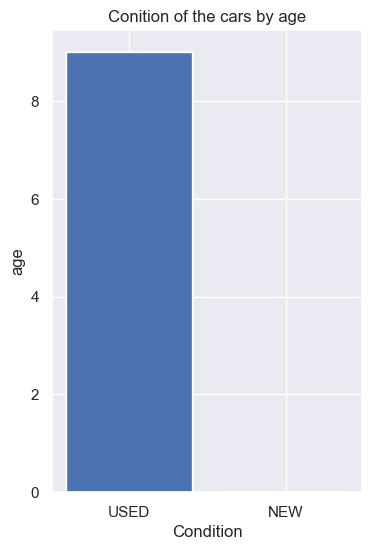

In [101]:
plt.subplots(figsize=(4,6))
plt.bar(subset['condition'], subset['age'])
plt.xlabel('Condition')
plt.ylabel('age')
plt.title('Conition of the cars by age')
plt.show()

The graph shows that there is no age for new cars.

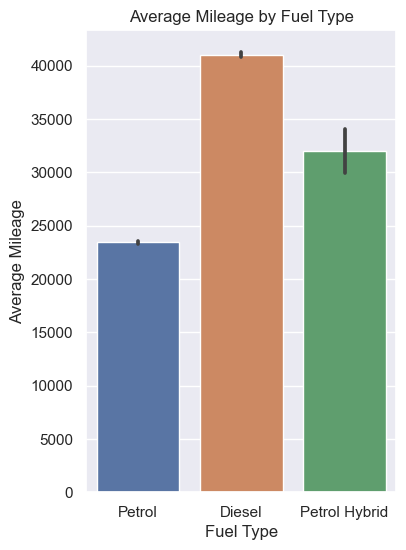

In [102]:
plt.subplots(figsize=(4,6))
sns.barplot(data=subset,y='mileage', x='fuel_type')
plt.xlabel("Fuel Type")
plt.ylabel("Average Mileage")
plt.title("Average Mileage by Fuel Type")
plt.show()

By the above graph diesel cars have more mileage than other car types.

<AxesSubplot:xlabel='body_type'>

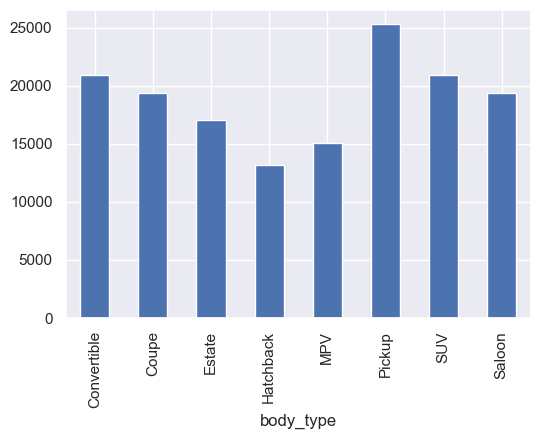

In [103]:
plt.subplots(figsize=(6,4))
subset.groupby('body_type')['price'].mean().plot.bar()

### 3.3. Categorical-Categorical

In [104]:
top_count_model_2021 = subset.groupby('model').size().reset_index(name='count').head(10).sort_values("count", ascending=False)
top_count_model_2021

,model,count
0,1 Series,5645
7,3 Series,5007
1,2 Series,1381
4,2 Series Gran Tourer,686
2,2 Series Active Tourer,675
8,3 Series Gran Turismo,282
3,2 Series Gran Coupe,88
5,200,5
6,220,3
9,350,2


In [105]:
top = subset.groupby(['fuel_type', 'make']).size().reset_index(name='counts')
top_fuel = top.groupby('fuel_type').apply(lambda x: x.nlargest(5,'counts'))
top_fuel

fuel_type           make  counts
fuel_type                                             
Diesel        1          Diesel            BMW   17127
              2          Diesel  Mercedes-Benz   16507
              0          Diesel           Audi   12979
              4          Diesel     Volkswagen   10328
              3          Diesel       Vauxhall    5668
Petrol        8          Petrol       Vauxhall   18884
              9          Petrol     Volkswagen   14680
              5          Petrol           Audi   12503
              6          Petrol            BMW    7610
              7          Petrol  Mercedes-Benz    6080
Petrol Hybrid 10  Petrol Hybrid            BMW     313
              12  Petrol Hybrid     Volkswagen      20
              11  Petrol Hybrid  Mercedes-Benz      16

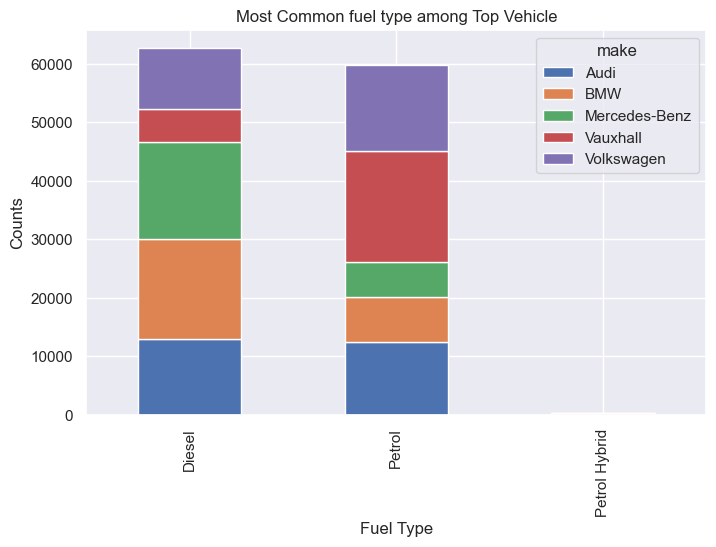

In [106]:
plot = top_fuel.pivot( index='fuel_type' ,columns='make', values='counts')
plot.plot(kind='bar', stacked=True)
plt.xlabel('Fuel Type')
plt.ylabel('Counts')
plt.title('Most Common fuel type among Top Vehicle')
plt.show()

The All top brands are having fuel_type as a Diesel or petrol

In [107]:
count = subset.groupby('body_type').size().reset_index(name='count')
count.columns = ['body_type', 'count']
count

,body_type,count
0,Convertible,4315
1,Coupe,10485
2,Estate,8890
3,Hatchback,53929
4,MPV,5559
5,Pickup,29
6,SUV,20924
7,Saloon,18584


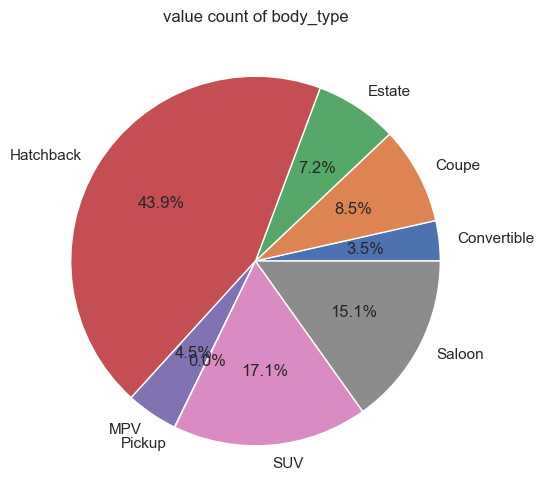

In [108]:
plt.figure(figsize=(8, 6))
condition = count['body_type']
price = count['count']
plt.pie(price, labels=condition, autopct='%1.1f%%')
plt.title('value count of body_type')
plt.show()

Among all top brands, hatchback is the most frequest one with 44%